1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [40]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

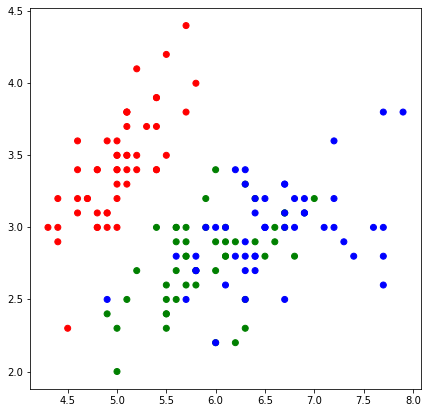

In [42]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [43]:
def e_metrics(x1, x2):
    '''Используем евклидову метрику'''   
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [44]:
def knn(x_train, y_train, x_test, k, weighed_method = 0):
    
    answers = []

    for x in x_test:
        test_distances = []
           
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
            
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 1
        for d in sorted(test_distances)[0:k]:
            if weighed_method == 0:   
                classes[d[1]] += 1
            if weighed_method == 1:   
                classes[d[1]] += 1/i
            if weighed_method == 2:
                q = 0.5
                classes[d[1]] += q**i
            if weighed_method == 3:
                a = 3
                b = 2
                classes[d[1]] += 1/(i+a)**b
            if weighed_method == 4:
                a = 3
                classes[d[1]] += (k + 1 - i)/k
            if weighed_method == 5:
                q = 0.75
                classes[d[1]] += q**d[0]
            i += 1
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [45]:
def accuracy(pred, y):
    '''вычисление точности'''
    return (sum(pred == y) / len(y))

In [46]:
def get_graph(X_train, y_train, k, w):
    '''график распределения классов'''
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, w)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Точность алгоритма при k = 15 и w = 0: 0.700


<ipython-input-46-d3e633badde0>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


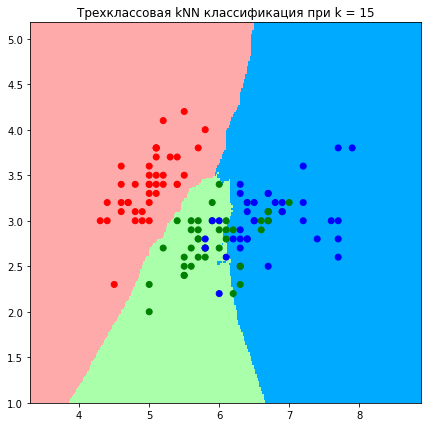

Точность алгоритма при k = 15 и w = 1: 0.733


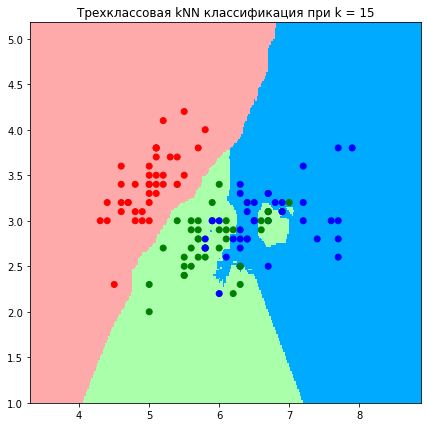

Точность алгоритма при k = 15 и w = 2: 0.700


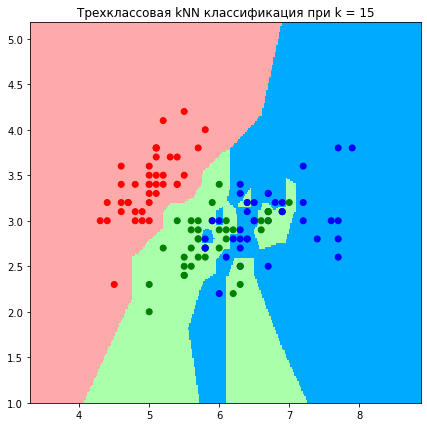

Точность алгоритма при k = 15 и w = 3: 0.733


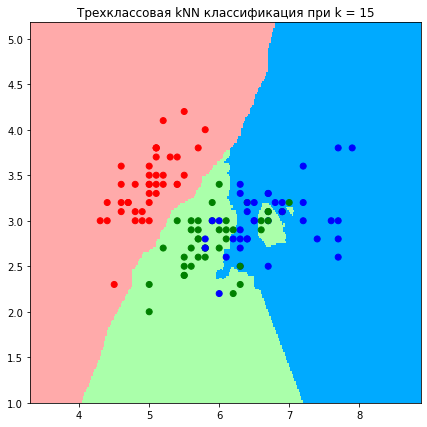

Точность алгоритма при k = 15 и w = 4: 0.733


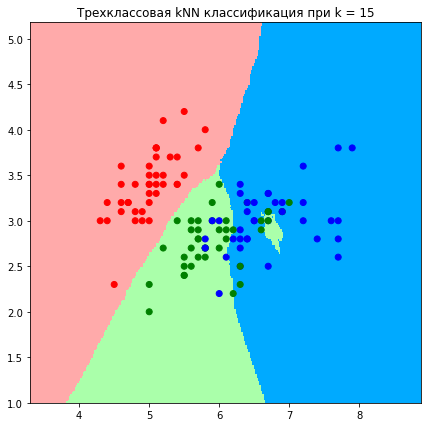

Точность алгоритма при k = 15 и w = 5: 0.700


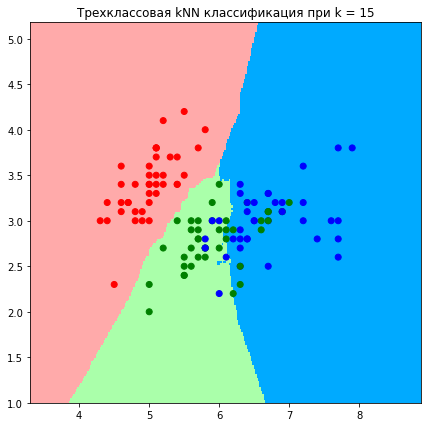

In [47]:
for w in range(6):
    k = 15
    y_pred = knn(X_train, y_train, X_test, k, weighed_method = w)
    print(f'Точность алгоритма при k = {k} и w = {w}: {accuracy(y_pred, y_test):.3f}')
    get_graph(X_train, y_train, k, w)

<ipython-input-29-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


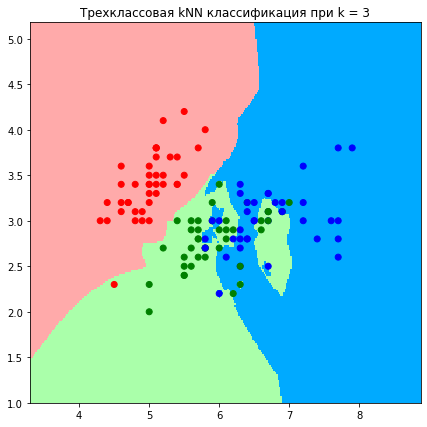